In [2]:
# Unduh Dataset MNIST
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

In [3]:
# Baca deskripsi dataset
# Tahap ini mungkin diperlukan untuk lebih memahami dataset
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [4]:
# Inspeksi semua key dalam dataset
# Cara ini digunakan untuk memahami struktur dari dataset MNIST
mnist.keys()
# print(type(mnist.data))
# mnist

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

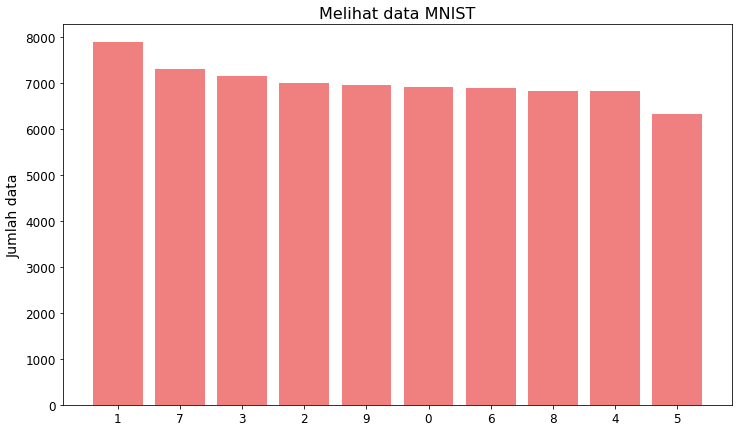

In [5]:
import numpy as np
import matplotlib.pyplot as plt

target = mnist.target.value_counts()

%matplotlib inline

plt.figure(figsize=(12,7))
plt.bar(target.keys(), target, color='lightcoral')

plt.title('Melihat data MNIST', size=16)
plt.ylabel('Jumlah data', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

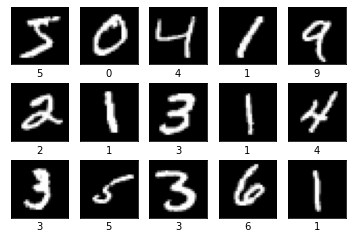

In [6]:
X = np.array(mnist.data)
Y = np.array(mnist.target)

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(X[i].reshape(28, 28), cmap='gray')
    axi.set(xticks=[], yticks=[],
            xlabel=Y[i])

Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
- Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
- Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

In [13]:
from sklearn.decomposition import PCA as RandomizedPCA

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)

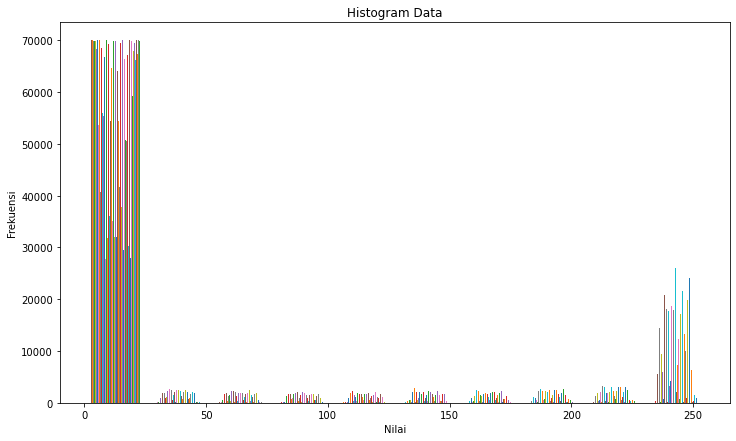

In [14]:
import matplotlib.pyplot as plt
import numpy as np

X = np.array(mnist.data)
Y = np.array(mnist.target)

plt.figure(figsize=(12,7))
plt.hist(X)
plt.title("Histogram Data")
plt.xlabel("Nilai")
plt.ylabel("Frekuensi")
plt.show()

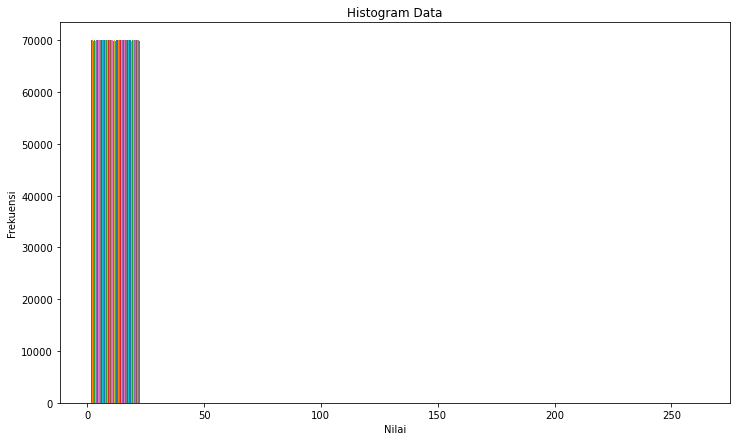

In [15]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()


scaler.fit(X)
x_standard = scaler.transform(X)

plt.figure(figsize=(12,7))
plt.hist(x_standard)
plt.title("Histogram Data")
plt.xlabel("Nilai")
plt.ylabel("Frekuensi")
plt.show()

Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

In [20]:
from sklearn.model_selection import train_test_split

train_x7, test_x3, train_y7, test_y3 = train_test_split( X, Y, test_size=0.3, random_state=0)
train_x8, test_x2, train_y8, test_y2 = train_test_split( X, Y, test_size=0.3, random_state=0)
train_x9, test_x1, train_y9, test_y1 = train_test_split( X, Y, test_size=0.3, random_state=0)

train_x7_pca = pca.fit_transform(train_x7)
test_x3_pca = pca.fit_transform(test_x3)

train_x8_pca = pca.fit_transform(train_x8)
test_x2_pca = pca.fit_transform(test_x2)

train_x9_pca = pca.fit_transform(train_x9)
test_x1_pca = pca.fit_transform(test_x1)

Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
   - Anda diperbolehkan untuk melakukan tunning parameter.
   - Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

In [21]:
from sklearn.naive_bayes import GaussianNB
# histogram 
model1 = GaussianNB()
model2 = GaussianNB()
model3 = GaussianNB()
# PCA 
model4 = GaussianNB()
model5 = GaussianNB()
model6 = GaussianNB()

# train & test 70:30
model1.fit(train_x7, train_y7);
model4.fit(train_x7_pca, train_y7);
# train & test 80:20
model2.fit(train_x8, train_y8);
model5.fit(train_x8_pca, train_y8);
# train & test 90:10
model3.fit(train_x9, train_y9);
model6.fit(train_x9_pca, train_y9);

# predict Histogram 
pred_y1 = model1.predict(test_x3)
pred_y2 = model2.predict(test_x2)
pred_y3 = model3.predict(test_x1)

# predict PCA 
pred_y4 = model4.predict(test_x3_pca)
pred_y5 = model5.predict(test_x2_pca)
pred_y6 = model6.predict(test_x1_pca)

# score Histogram 
score1 = model1.score(test_x3,test_y3)
score2 = model2.score(test_x2,test_y2)
score3 = model3.score(test_x1,test_y1)

# score PCA 
score4 = model4.score(test_x3_pca,test_y3)
score5 = model5.score(test_x2_pca,test_y2)
score6 = model6.score(test_x1_pca,test_y1)

print("Score Histogram")
print("Score 70:30  : ", score1)
print("Score 80:20  : ", score2)
print("Score 90:10  : ", score3)
print("Score PCA")
print("Score 70:30  : ", score4)
print("Score 80:20  : ", score5)
print("Score 90:10  : ", score6)

Score Histogram
Score 70:30  :  0.541047619047619
Score 80:20  :  0.541047619047619
Score 90:10  :  0.541047619047619
Score PCA
Score 70:30  :  0.4769047619047619
Score 80:20  :  0.4769047619047619
Score 90:10  :  0.4769047619047619


Evaluasi model yang Anda buat terhadap data training dan data testing.
- Gunakan metric *accuracy* untuk mengetahui tingkat akurasi data training dan data testing.
- Gunakan fungsi *classification_report* untuk mengetahui performa model secara holistik.
- Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Metric Accuracy 

accuracy1 = accuracy_score(test_y3, pred_y1)
accuracy2 = accuracy_score(test_y2, pred_y2)
accuracy3 = accuracy_score(test_y1, pred_y3)

print("Metric Accuracy 70:30  : ", accuracy1)
print("Metric Accuracy 80:20  : ", accuracy2)
print("Metric Accuracy 90:10  : ", accuracy3)

# Classification Report 

report1 = classification_report(test_y3, pred_y1)
report2 = classification_report(test_y2, pred_y2)
report3 = classification_report(test_y1, pred_y3)

print("Classification Report 70:30")
print(report1)
print("Classification Report 80:20")
print(report2)
print("Classification Report 90:10")
print(report3)

# Confusion Matrix 
cm1 = confusion_matrix(test_y3, pred_y1)
cm2 = confusion_matrix(test_y2, pred_y2)
cm3 = confusion_matrix(test_y1, pred_y3)

print("Confusion Matrix 70:30")
print(cm1)
print("Confusion Matrix 80:20")
print(cm2)
print("Confusion Matrix 90:10")
print(cm3)

Metric Accuracy 70:30  :  0.541047619047619
Metric Accuracy 80:20  :  0.541047619047619
Metric Accuracy 90:10  :  0.541047619047619
Classification Report 70:30
              precision    recall  f1-score   support

           0       0.74      0.87      0.80      2077
           1       0.80      0.95      0.87      2385
           2       0.86      0.31      0.45      2115
           3       0.79      0.28      0.42      2117
           4       0.82      0.14      0.24      2004
           5       0.58      0.05      0.09      1900
           6       0.58      0.95      0.72      2045
           7       0.89      0.28      0.43      2189
           8       0.28      0.55      0.37      2042
           9       0.35      0.94      0.51      2126

    accuracy                           0.54     21000
   macro avg       0.67      0.53      0.49     21000
weighted avg       0.67      0.54      0.50     21000

Classification Report 80:20
              precision    recall  f1-score   support

Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.

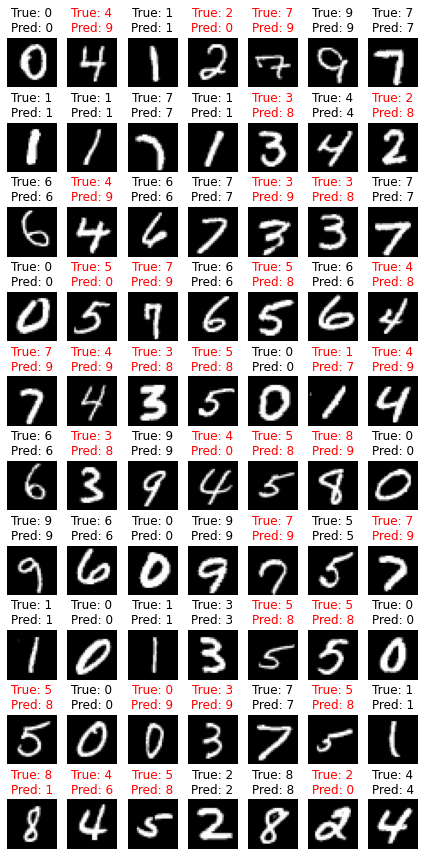

In [19]:
import pandas as pd

n_samples_to_display = 70
# Display images with true labels and predicted labels
plt.figure(figsize=(6, 12))
for i in range(n_samples_to_display):
    plt.subplot(10, 7, i + 1)
    plt.imshow(test_x3[i].reshape(28, 28), cmap="gray")

    # Determine text color based on true or predicted
    true_label = test_y3[i] if isinstance(test_y3, pd.Series) else test_y3[i]
    pred_label = pred_y1[i] if isinstance(pred_y1, pd.Series) else pred_y1[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis("off")

plt.tight_layout()
plt.show()